In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_50504_Z')

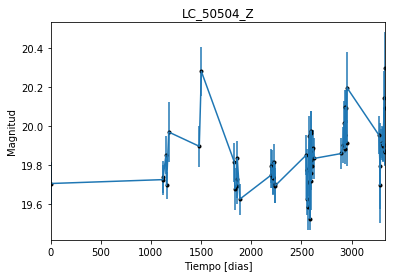

In [2]:
data = np.genfromtxt('LC_50504_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_50504_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

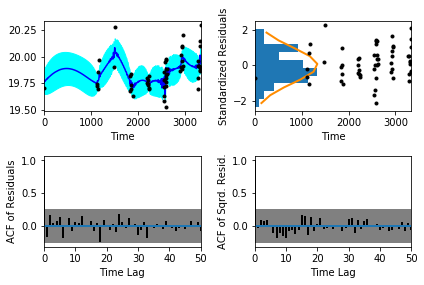

In [5]:
sample.assess_fit()

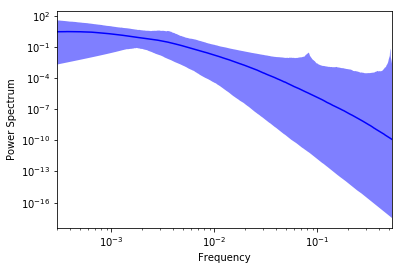

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_50504_Z')

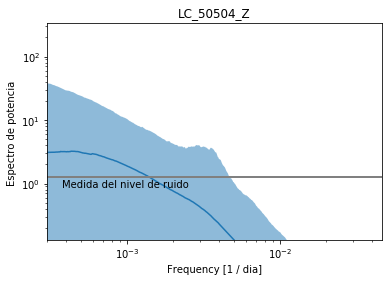

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_50504_Z')

Text(0.5,1,'Prediccion , valor esperado LC_50504_Z')

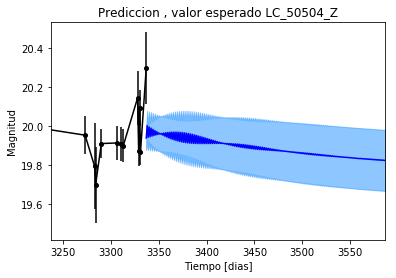

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_50504_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_50504_Z')

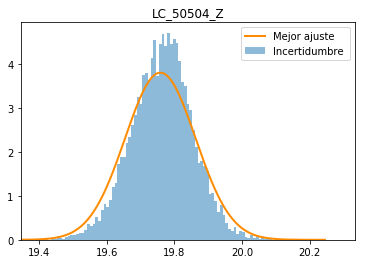

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_50504_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_50504_Z')

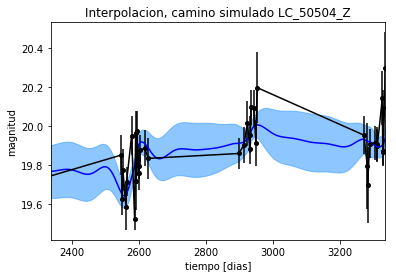

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50504_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_50504_Z')

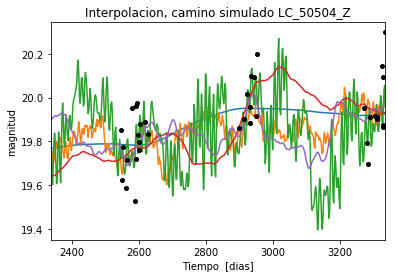

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50504_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 981.771872287
Median: 0.00471569452688
Standard deviation: 0.156633372958
68% credibility interval: [ 0.0006916   0.07644352]
95% credibility interval: [  3.33863639e-04   6.38349869e-01]
99% credibility interval: [  3.06869870e-04   9.47461570e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 912.010133694
Median: 0.00212626712187
Standard deviation: 0.0690448565846
68% credibility interval: [ 0.00050935  0.01782229]
95% credibility interval: [ 0.00032385  0.19064452]
99% credibility interval: [  3.04733061e-04   4.94937146e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 991.024251645
Median: 0.0178091188116
Standard

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 151.150653318
Median: 62.1153049999
Standard deviation: 1.96672498064
68% credibility interval: [ 60.33406787  63.37143592]
95% credibility interval: [ 57.7724561   66.96902005]
99% credibility interval: [ 55.5947707   67.98794401]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 938.016558984
Median: 0.531991970489
Standard deviation: 2.13533496346
68% credibility interval: [ 0.05006756  3.74042361]
95% credibility interval: [ 0.01527997  7.00739451]
99% credibility interval: [  9.76029853e-03   9.84947399e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 651.715057426
Median: 0.457643354167
Standard deviation: 8.53015803582
68% credibility interval: [ 0.01270288  9.86832837]
95% credibility interval: [  7.7

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 472.005682132
Median: 7.60627629747e-13
Standard deviation: 4.27060253797e+89
68% credibility interval: [  5.73766637e-62   7.40068898e+39]
95% credibility interval: [  2.92690456e-116   1.16089559e+072]
99% credibility interval: [  1.80539309e-124   9.57254557e+087]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2872.67781309
Median: 19.8271502686
Standard deviation: 0.0590796850715
68% credibility interval: [ 19.7817377   19.87423013]
95% credibility interval: [ 19.70257289  19.94427771]
99% credibility interval: [ 19.62463581  20.00489547]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 396.694456631
Median: 0.0264128504213
Standard deviation: 0.244789608268
68% credibility interval: [ 0.         0.4742536]
95% credibility interval: [ 0.          0.84801214]
99% credibility interval: [ 0.          1.00863378]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 396.694456631
Median: 0.0264128504213
Standard deviation: 0.244789608268
68% credibility interval: [ 0.         0.4742536]
95% credibility interval: [ 0.          0.84801214]
99% credibility interval: [ 0.          1.00863378]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1992.72156408
Median: 0.0
Standard deviation: 0.0143904832636
68% credibil

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 151.150653318
Median: 62.1153049999
Standard deviation: 1.96672498064
68% credibility interval: [ 60.33406787  63.37143592]
95% credibility interval: [ 57.7724561   66.96902005]
99% credibility interval: [ 55.5947707   67.98794401]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2816.69366259
Median: 0.0154451562877
Standard deviation: 0.0223626816065
68% credibility interval: [ 0.00821389  0.02986246]
95% credibility interval: [ 0.0042848   0.06659894]
99% credibility interval: [ 0.00283614  0.12911058]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 620.062164598
Median: 1.17780592803
Standard deviation: 0.201769203498
68% credibility interval: [ 1.00234827  1.39098992]
95% credibility interval: [ 0.84098675  1.63577932]
99% credibility interval: [ 0.78137529  1.83638822]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1361.0244367
Median: 1.42033081285e-05
Standard deviation: 0.645919008955
68% credibility interval: [  2.13607373e-43   6.62356037e-03]
95% credibility interval: [  7.97057887e-77   3.68742010e-01]
99% credibility interval: [  5.08737093e-91   1.16049313e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 981.771872287
Median: (-0.0296295825644-1.58188597377j)
Standard deviation: 1.82597587296
68% credibility interval: [-0.48030881-0.52936804j -0.00434543-0.0567376j ]
95% credibility interval: [ -4.01087052e+00+0.j          -2.09772711e-03-0.02439727j]
99% credibility interval: [ -5.95307661e+00+0.j          -1.92812026e-03-0.00404909j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 912.010133694
Median: (-0.0133597303393+1.4832318838j)
Standard deviation: 1.59806916699
68% credibility interval: [-0.11198073+0.47680327j -0.00320031+0.00333302j]
95% credibility interval: [-1.19785483+4.25940463j -0.00203482+0.0177484j ]
99% credibility interval: [ -3.10978181e+00+4.23038955j  -1.91469429e-03+0.81714392j]
Posterior summa